<a href="https://colab.research.google.com/github/ddlandim/monografy-ann-demand-prediction/blob/master/case2_ModelsTests_DriverCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
prefix = 'case2_'
path = 'https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/'
sufix = '?raw=true'

# **BIBLIOTECAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('ggplot')
# PROCESSAMENTO
from sklearn.preprocessing import *
from sklearn.metrics import *
# MODELOS
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import seaborn as sns
import scipy

# EXPORTAÇÃO / IMPORTAÇÃO
# Lib para exportar scalers
# https://scikit-learn.org/stable/modules/model_persistence.html
from joblib import dump, load

# Lib para exportar numpy ou arrays
# https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html
import h5py

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# IMPORTAÇÃO DOS DADOS

## Teste de indexação e inclusão de features em um dataframe com as métricas das avaliações.

In [ ]:
df_models_metrics = pd.DataFrame(columns=['MODELO','TOTAL_CONSUMIDAS','TOTAL_PREVISTAS','ERRO_TOTAL_PREVISAO','ERRO_TOTAL_PERC_PREVISAO', 'CORRELACAO', 'pi', 'RMSE', 'TOTAL_FALTA', 'TOTAL_DESCARTE', 'ERRO_ABS_MEDIANO' , 'ERRO_ABSOLUTO_PERCENTUAL_MEDIO'])
df_models_metrics

,MODELO,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO


In [ ]:
df_models_metrics = df_models_metrics.set_index('MODELO')
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,


In [ ]:
new_row = pd.Series(data={ 'TOTAL_CONSUMIDAS':87, 
           'TOTAL_PREVISTAS':92, 
           'ERRO_TOTAL_PREVISAO':97,
           'ERRO_TOTAL_PERC_PREVISAO':100,
           'CORRELACAO':97, 
           'pi':97, 
           'RMSE':97, 
           'TOTAL_FALTA':97, 
           'TOTAL_DESCARTE':97, 
           'ERRO_ABS_MEDIANO':97, 
           'ERRO_ABSOLUTO_PERCENTUAL_MEDIO':97}, 
           name = 'dummy')
df_models_metrics = df_models_metrics.append(new_row, ignore_index=False)
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,
dummy,87,92,97,100,97,97,97,97,97,97,97


In [ ]:
df_models_metrics.drop('dummy', inplace = True)
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,


## **case2_** CONJUNTO DE TESTE = 2019-01-01 À 2019-07-31

In [ ]:
df_test = pd.read_pickle("https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_df_test.pkl?raw=true")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2019-02-20 to 2019-12-16
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEMESTRE_1                182 non-null    int64  
 1   SEMESTRE_2                182 non-null    int64  
 2   SEGUNDA                   182 non-null    int64  
 3   TERCA                     182 non-null    int64  
 4   QUARTA                    182 non-null    int64  
 5   QUINTA                    182 non-null    int64  
 6   SEXTA                     182 non-null    int64  
 7   DISTANCIA_DIA_ANTERIOR    182 non-null    int64  
 8   DISTANCIA_DIA_POSTERIOR   182 non-null    int64  
 9   PERC_CONCLUSAO_SEM        182 non-null    float64
 10  PERC_CONCLUSAO_MES        182 non-null    float64
 11  PRESSAO_ATMOSFERICA       182 non-null    float64
 12  TEMPERATURA               182 non-null    float64
 13  UMIDADE                   182 non-null    int6

In [ ]:
df_test.head()

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-20,1,0,0,0,1,0,0,61,1,0.73,71.43,947.9,23.7,78,0.5,966,10,40,58,95,111,441,14,35,44,88,77,246,0,17,14,27,50,100,65,79.020714,62.571854,62.571854,67.317268,50.091915,456.342712,382.416962,283.176819
2019-02-21,1,0,0,0,0,1,0,1,1,1.46,75.00,949.8,22.9,84,1.5,779,966,10,40,58,95,458,441,14,35,44,88,279,246,0,17,14,27,114,35,459.848724,347.059082,347.059082,432.812622,508.283020,468.135895,340.036774,151.240524
2019-02-22,1,0,0,0,0,0,1,1,3,2.19,78.57,951.6,25.5,77,2.7,314,779,966,10,40,58,275,458,441,14,35,44,61,279,246,0,17,14,57,18,388.522095,383.884796,383.884796,404.804108,329.090057,418.127380,347.315704,204.548737
2019-02-25,1,0,1,0,0,0,0,3,1,4.38,89.29,946.4,27.6,71,0.6,807,314,779,966,10,40,455,275,458,441,14,35,196,61,279,246,0,17,45,22,432.235291,294.330261,294.330261,400.811035,304.004944,295.358978,256.305359,247.179459
2019-02-26,1,0,0,1,0,0,0,1,1,5.11,92.86,949.8,21.4,87,1.6,615,807,314,779,966,10,401,455,275,458,441,14,233,196,61,279,246,0,18,0,393.512115,329.142548,329.142548,411.179962,418.618652,323.483154,332.013275,299.521332


In [ ]:
df_test.tail()

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-10,0,1,0,1,0,0,0,1,1,95.52,32.26,947.8,22.9,81,1.8,75,157,116,291,283,414,61,122,112,170,257,292,19,69,39,132,111,163,379,211,195.135483,191.424683,191.424683,180.425507,176.402603,180.077759,218.612289,243.659103
2019-12-11,0,1,0,0,1,0,0,1,1,96.27,35.48,946.6,22.9,82,1.6,45,75,157,116,291,283,49,61,122,112,170,257,9,19,69,39,132,111,334,144,142.265915,142.691605,142.691605,144.328751,84.207855,116.203125,155.100861,208.853088
2019-12-12,0,1,0,0,0,1,0,1,1,97.01,38.71,945.2,22.2,75,1.0,43,45,75,157,116,291,54,49,61,122,112,170,8,9,19,69,39,132,221,171,126.133835,100.141594,100.141594,127.632721,83.821526,69.310188,95.805367,163.932114
2019-12-13,0,1,0,0,0,0,1,1,3,97.76,41.94,948.2,24.1,74,2.0,7,43,45,75,157,116,14,54,49,61,122,112,0,8,9,19,69,39,145,50,83.581696,79.648407,79.648407,80.023613,66.704697,25.004608,67.734497,155.499100
2019-12-16,0,1,1,0,0,0,0,3,61,100.00,51.61,947.8,28.3,46,5.6,5,7,43,45,75,157,8,14,54,49,61,122,0,0,8,9,19,69,158,89,76.752899,58.757206,58.757206,67.750961,25.787176,9.000000,9.000000,81.170753


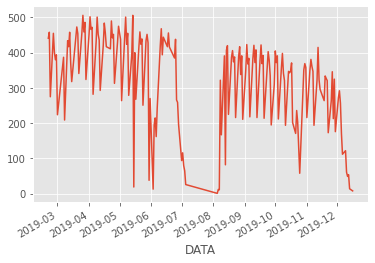

In [ ]:
df_test['ENTR_ALMOCO'].plot()

## NP ARRAYS ESCALADOS E FORMATADOS PARA ENTRADA DOS MODELOS

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_np_data.h5?raw=true

--2020-09-27 05:08:41--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_np_data.h5?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_np_data.h5 [following]
--2020-09-27 05:08:41--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_np_data.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_np_data.h5 [following]
--2020-09-27 05:08:41--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_np_data.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.1

In [ ]:
hf = h5py.File('./case2_np_data.h5?raw=true', 'r')
hf.keys()

<KeysViewHDF5 ['scaled_test_x', 'scaled_test_y', 'scaled_train_x', 'scaled_train_y', 'scaled_val_x', 'scaled_val_y', 'test_x_dense', 'train_x_dense', 'val_x_dense']>

In [ ]:
# Dados Recorrentes(temporais), escalados
scaled_recurrent_train_x = np.array(hf.get('scaled_train_x'))
scaled_recurrent_val_x = np.array(hf.get('scaled_val_x'))
scaled_recurrent_test_x = np.array(hf.get('scaled_test_x'))

# Dados Categóricos (dias da semana e semestre já escalados no df original)
# concatenados com Dados Pontuais (climáticos) escalados
scaled_discrete_train_x = np.array(hf.get('train_x_dense'))
scaled_discrete_val_x = np.array(hf.get('val_x_dense'))
scaled_discrete_test_x = np.array(hf.get('test_x_dense'))

# Valores de supervisão (saída) de cada dataframe, escalados
scaled_train_y = np.array(hf.get('scaled_train_y'))
scaled_val_y = np.array(hf.get('scaled_val_y'))
scaled_test_y = np.array(hf.get('scaled_test_y'))

In [ ]:
hf.close()

## Importando Scalers para transformar a saída em valores reais.

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_scaler_numpont.joblib?raw=true

--2020-09-27 05:08:42--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_scaler_numpont.joblib?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_scaler_numpont.joblib [following]
--2020-09-27 05:08:42--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_scaler_numpont.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_scaler_numpont.joblib [following]
--2020-09-27 05:08:42--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_scaler_numpont.joblib
Resolving raw.githubusercontent.com (raw.githubuserc

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_rnn_scalers_arr.joblib?raw=true

--2020-09-27 05:08:42--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_rnn_scalers_arr.joblib?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_rnn_scalers_arr.joblib [following]
--2020-09-27 05:08:42--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_rnn_scalers_arr.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_rnn_scalers_arr.joblib [following]
--2020-09-27 05:08:43--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_rnn_scalers_arr.joblib
Resolving raw.githubusercontent.com (raw.github

In [ ]:
num_temporais = 3 #ENTR_ALMOCO, VENDAS_ALMOCO, ENTR_JANTAR
discrete_scaler = MinMaxScaler([0,1])
discrete_scaler = load('./case2_scaler_numpont.joblib?raw=true')

recurrent_scalers = [MinMaxScaler([0,1]) for i in range(num_temporais)]
recurrent_scalers = load('./case2_rnn_scalers_arr.joblib?raw=true')

# **FUNÇÕES DE AVALIAÇÃO DOS MODELOS**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true = np.maximum(y_true, 1e-7)  # Prevent division by zero
  return 100. * np.mean(np.abs((y_true - y_pred) / y_true))

def metricas_predicoes(_df_true,_predStr,_df_models_metrics):
  m_df_models_metrics = pd.DataFrame()
  m_df_models_metrics = _df_models_metrics
  df = pd.DataFrame()
  df = _df_true

  arr_true = df['ENTR_ALMOCO']
  sum_true = np.sum(arr_true)
  len_true = len(arr_true)

  arr_pred = df[_predStr]
  sum_pred = np.sum(arr_pred)
  len_pred = len(arr_pred)

  diff_pred = sum_pred - sum_true
  perc_diff_pred = (diff_pred / max(1e-7,sum_true)) * 100

  arr_e = arr_true - arr_pred

  print("TOTAL DE REFEIÇÕES CONSUMIDAS = " + str(sum_true) + " : " + str(len_true) + " linhas")
  print("TOTAL DE REFEIÇÕES PROJETADAS = " + str(sum_pred) + " : " + str(len_pred) + " linhas")
  print("ERRO DE PREVISÃO = " + str(diff_pred) + " " + str(perc_diff_pred) + " % do total consumido")

  m_r, m_p = scipy.stats.pearsonr(arr_true, arr_pred)
  print("CORRELAÇÃO (r): " + str(m_r) + " Pi (p) :" + str(m_p))
  sns.regplot(x=arr_true,y=arr_pred,data=df)

  rmse = mean_squared_error(arr_true, arr_pred, squared=False)
  print("RMSE = " + str(rmse))

  m_mae = np.median(np.abs(arr_e))
  m_mape = mean_absolute_percentage_error(arr_true,arr_pred)

  subpredictions = sum(i for i in arr_e if i < 0)
  superpredictions = sum(i for i in arr_e if i >= 0)

  print("TOTAL DE REFEIÇÕES SUB PROJETADAS = " + str(subpredictions))
  print("TOTAL DE REFEIÇÕES SUPER PROJETADAS = " + str(superpredictions))
  print("ERRO ABSOLUTO MEDIANO = " + str(m_mae))
  print("ERRO ABSOLUTO PERCENTUAL MEDIO = " + str(m_mape)+"%")
  plt.figure(figsize=(30,5))
  df['ENTR_ALMOCO'].plot( linewidth=1.5, color='red', label = 'ALMOÇO REAL')
  df[_predStr].plot( linewidth=2.5, color='blue', label = 'ALMOÇO PREVISTO')
  plt.legend()
  plt.xlabel("Index", labelpad=15)
  plt.show()
  #['MODELO','TOTAL_CONSUMIDAS','TOTAL_PROJETADAS','ERRO_PROJECAO', 'CORRELACAO', 'pi', 'RMSE', 'TOTAL SUBPROJETADO', 'TOTAL SUPER PROJETADO ', 'ERRO ABS MEDIANO' , 'ERRO ABSOLUTO PERCENTUAL MEDIO']
  new_row = pd.Series(data={ 'TOTAL_CONSUMIDAS':sum_true, 
          'TOTAL_PREVISTAS':sum_pred, 
          'ERRO_TOTAL_PREVISAO':diff_pred,
          'ERRO_TOTAL_PERC_PREVISAO':perc_diff_pred,
          'CORRELACAO':m_r, 
          'pi':m_p, 
          'RMSE':rmse, 
          'TOTAL_FALTA':subpredictions, 
          'TOTAL_DESCARTE':superpredictions, 
          'ERRO_ABS_MEDIANO':m_mae, 
          'ERRO_ABSOLUTO_PERCENTUAL_MEDIO':m_mape}, 
          name = _predStr)
  m_df_models_metrics = m_df_models_metrics.append(new_row, ignore_index=False)
  return m_df_models_metrics

# **PREVISÕES**

## IMPORTAÇÃO DOS MODELOS ENDÓGENOS

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_MLP_ENDO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_1_NEW_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_2_validated.h5?raw=true

--2020-09-27 05:08:43--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_MLP_ENDO_1_validated.h5?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_MLP_ENDO_1_validated.h5 [following]
--2020-09-27 05:08:43--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_MLP_ENDO_1_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_MLP_ENDO_1_validated.h5 [following]
--2020-09-27 05:08:43--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_MLP_ENDO_1_validated.h5
Resolving raw.githubusercontent.com (raw.g

case2_MLP_ENDO_2_validated.h5

case2_RNN_ENDO_2_validated.h5

case2_RNN_ENDO_2_NEW_validated.h5

case2_RNN_ENDO_2_validated.h5

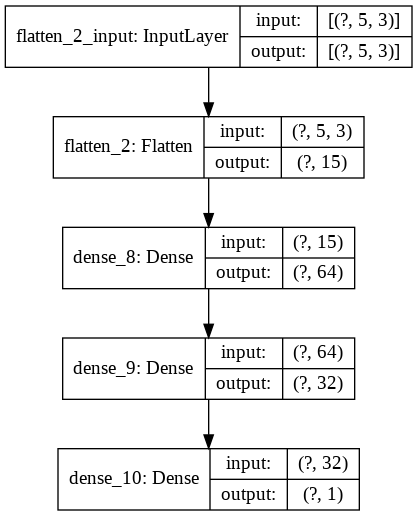

In [ ]:
MLP_ENDO_1 = keras.models.Sequential()
MLP_ENDO_1 = keras.models.load_model('/content/case2_MLP_ENDO_1_validated.h5?raw=true')
keras.utils.plot_model(MLP_ENDO_1, show_shapes=True)

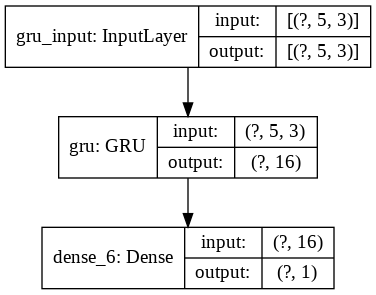

In [ ]:
RNN_ENDO_1 = keras.models.Sequential()
RNN_ENDO_1 = keras.models.load_model('/content/case2_RNN_ENDO_1_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

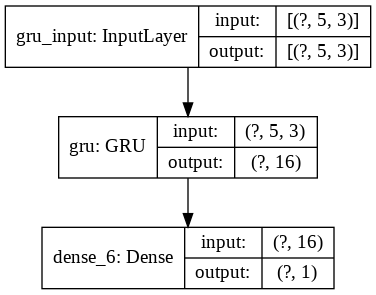

In [ ]:
RNN_ENDO_1_NEW = keras.models.Sequential()
RNN_ENDO_1_NEW = keras.models.load_model('/content/case2_RNN_ENDO_1_NEW_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

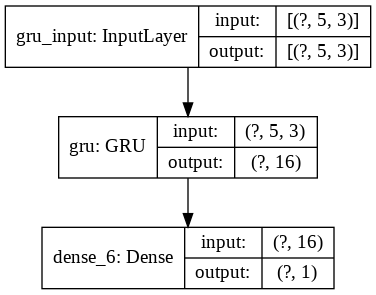

In [ ]:
RNN_ENDO_2 = keras.models.Sequential()
RNN_ENDO_2 = keras.models.load_model('/content/case2_RNN_ENDO_2_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

### PREDIÇÕES COM OS MODELOS ENDOGENOS COM OS MENORES RMSE NA FASE EXPERIMENTAL

#### RNN_ENDO_2

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 61855.137 : 182 linhas
ERRO DE PREVISÃO = 3202.13671875 5.4594593946601195 % do total consumido
CORRELAÇÃO (r): 0.6271911103490949 Pi (p) :2.7285304857953986e-21
RMSE = 105.32840625438163
TOTAL DE REFEIÇÕES SUB PROJETADAS = -8335.338466644287
TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5133.1997928619385
ERRO ABSOLUTO MEDIANO = 55.77996826171875
ERRO ABSOLUTO PERCENTUAL MEDIO = 101.28460969816464%


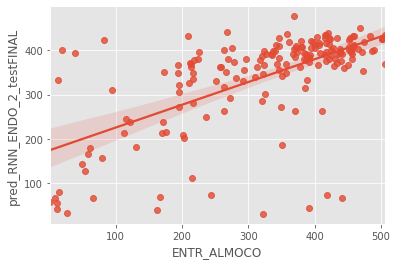

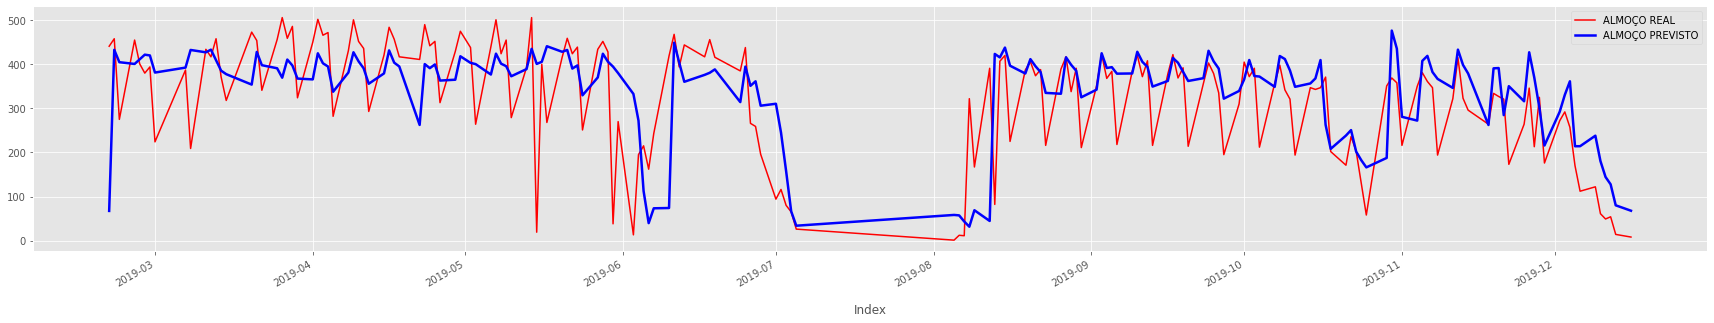

In [ ]:
#RNN_ENDO_2
model_name = 'RNN_ENDO_2'
model = RNN_ENDO_2
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

reg = 'pred_' + model_name + '_testFINAL'
df_test[reg] = pred_y
df_models_metrics = metricas_predicoes(df_test, reg,df_models_metrics)

In [ ]:
RNN_ENDO_2.layers[0].get_weights()

[array([[-6.65473342e-01, -5.87201357e-01, -2.34266624e-01,
          2.05517828e-01, -4.74901527e-01, -4.72701937e-02,
         -5.92277884e-01,  2.02438116e-01, -4.50641245e-01,
         -1.72624454e-01,  1.19672203e+00, -4.21165317e-01,
         -7.82863617e-01, -7.35249877e-01, -7.89374828e-01,
         -4.52484190e-01,  4.36782241e-01,  3.97858888e-01,
         -4.20256376e-01,  1.27916992e-01,  1.68274902e-03,
         -3.27195615e-01,  2.68818170e-01, -1.42368302e-01,
         -3.17325220e-02,  3.76201957e-01, -1.72629267e-01,
          4.24646646e-01,  2.86521465e-01,  2.48051174e-02,
          2.01324493e-01, -1.45750538e-01, -2.28243634e-01,
         -1.65212706e-01,  3.12690794e-01, -2.86111563e-01,
         -2.88671315e-01, -1.68750748e-01, -3.31560016e-01,
         -1.03903867e-01, -9.98405293e-02, -2.87459999e-01,
          2.86131874e-02,  2.62668222e-01,  3.90929818e-01,
          3.29968482e-01,  1.54536694e-01, -2.92964606e-03],
        [-1.12344766e+00, -3.30961764e-

In [ ]:
df_test['2019-05-10':'2019-06-10']['ENTR_ALMOCO']

DATA
2019-05-10    279
2019-05-13    393
2019-05-14    506
2019-05-15     19
2019-05-16    400
2019-05-17    268
2019-05-20    416
2019-05-21    459
2019-05-22    424
2019-05-23    439
2019-05-24    251
2019-05-27    434
2019-05-28    452
2019-05-29    428
2019-05-30     38
2019-05-31    270
2019-06-03     13
2019-06-04    195
2019-06-05    215
2019-06-06    162
2019-06-07    243
2019-06-10    419
Name: ENTR_ALMOCO, dtype: int64

In [ ]:
df_test['2019-03-01':'2019-03-10']['ENTR_ALMOCO']

DATA
2019-03-01    224
2019-03-07    387
2019-03-08    209
Name: ENTR_ALMOCO, dtype: int64

#### DATAS OUTLIERS

ANOMALIA: 
2019-03-08 --- 209 (SEXTA - FEIRA, NA SEMANA TEVE FERIADO NA TERÇA DIA 05, INICIO DO SEMESTRE)

OUTLIERS:
2019-05-15 --- 19 (PARALIZAÇÃO)

2019-05-30 --- 38 (PARALIZAÇÃO)

2019-06-03 --- 13

#### MLP_ENDO_2

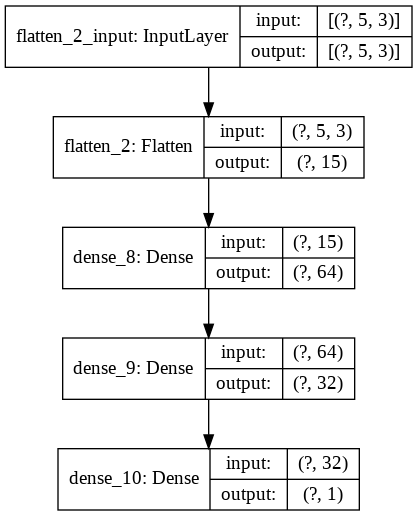

In [ ]:
keras.utils.plot_model(MLP_ENDO_1, show_shapes=True)

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 60037.89 : 182 linhas
ERRO DE PREVISÃO = 1384.890625 2.361159062622543 % do total consumido
CORRELAÇÃO (r): 0.6599238180864421 Pi (p) :3.989880365807712e-24
RMSE = 101.15156236824009
TOTAL DE REFEIÇÕES SUB PROJETADAS = -7096.577033996582
TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5711.684371948242
ERRO ABSOLUTO MEDIANO = 53.880401611328125
ERRO ABSOLUTO PERCENTUAL MEDIO = 98.55164895578133%


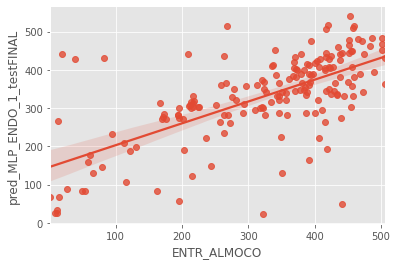

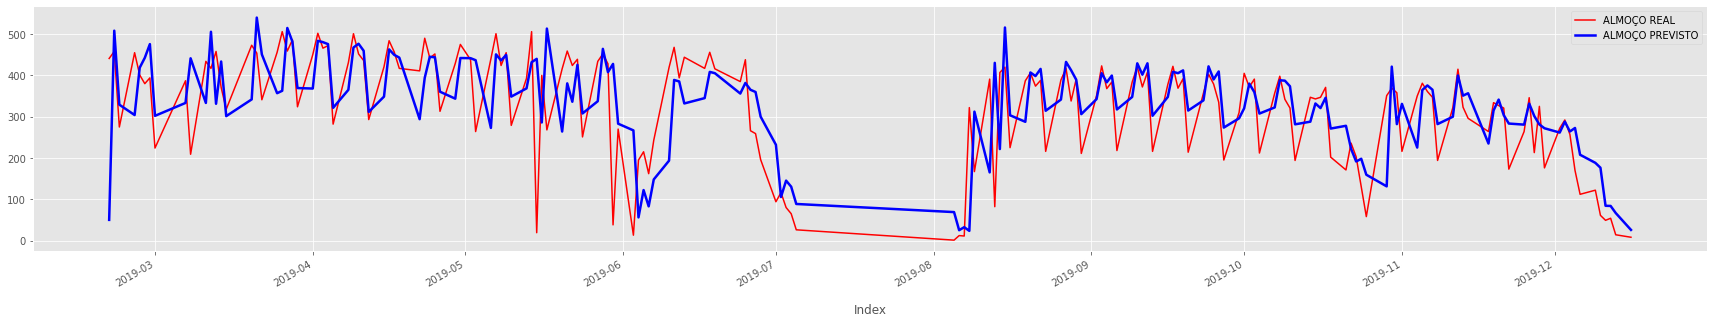

In [ ]:
model_name = 'MLP_ENDO_1'
model = MLP_ENDO_1
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

reg = 'pred_' + model_name + '_testFINAL'
df_test[reg] = pred_y
df_models_metrics = metricas_predicoes(df_test, reg , df_models_metrics)

In [ ]:
MLP_ENDO_1.layers[1].get_weights()

[array([[ 2.33237535e-01, -2.50083268e-01,  1.81550324e-01,
         -1.76464096e-02, -1.52024120e-01, -1.02587687e-02,
         -1.96280852e-01, -1.51965201e-01,  2.42056921e-01,
          8.89000222e-02, -1.55477494e-01, -2.49144565e-02,
          1.36015102e-01,  3.04704458e-01, -1.00124121e-01,
         -6.66192025e-02,  2.58435428e-01, -2.15657651e-01,
         -2.21911315e-02,  2.81899959e-01, -1.39941916e-01,
          1.67916253e-01,  6.87908679e-02,  2.58190989e-01,
         -5.23008481e-02, -7.24274144e-02, -3.88240479e-02,
         -1.44690806e-02,  1.46757782e-01,  2.51638055e-01,
         -1.21770076e-01, -1.56352907e-01,  1.56734556e-01,
         -6.44917563e-02, -9.09197330e-02,  1.98494285e-01,
         -9.38064754e-02,  2.54801869e-01, -2.03333840e-01,
         -3.34796906e-02,  2.48494774e-01, -1.98545337e-01,
          1.57271966e-01, -2.61776686e-01,  1.21679209e-01,
         -1.58810943e-01, -1.78991646e-01,  1.81961864e-01,
         -5.18011563e-02, -1.54330000e-0

## IMPORTAÇÃO DOS MODELOS MISTOS (ENDÓGENOS E EXÓGENOS)

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_2_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_3_validated.h5?raw=true

--2020-09-27 05:09:01--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_1_validated.h5?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_RNN_EXO_1_validated.h5 [following]
--2020-09-27 05:09:01--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_RNN_EXO_1_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_RNN_EXO_1_validated.h5 [following]
--2020-09-27 05:09:01--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_RNN_EXO_1_validated.h5
Resolving raw.githubusercontent.com (raw.github

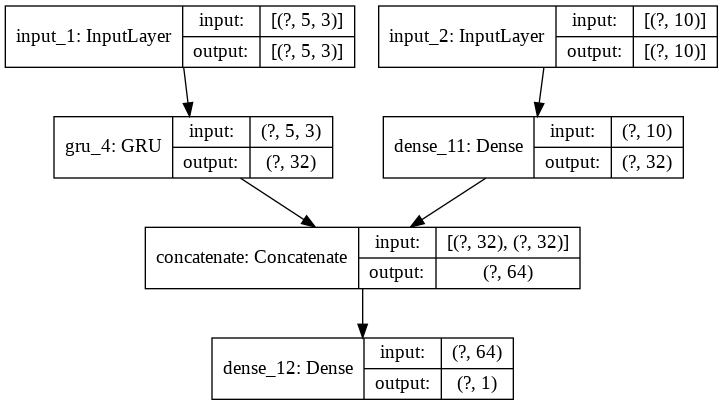

In [ ]:
RNN_EXO_1 = keras.models.Sequential()
RNN_EXO_1 = keras.models.load_model('/content/case2_RNN_EXO_1_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_1, show_shapes=True)

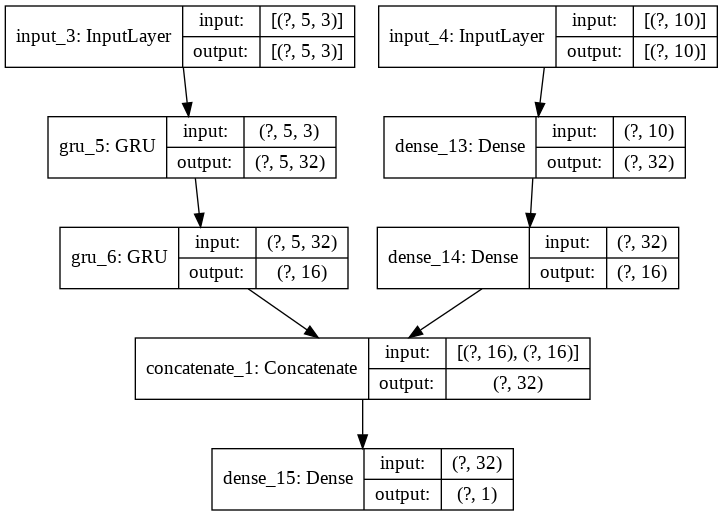

In [ ]:
RNN_EXO_2 = keras.models.Sequential()
RNN_EXO_2 = keras.models.load_model('/content/case2_RNN_EXO_2_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_2, show_shapes=True)

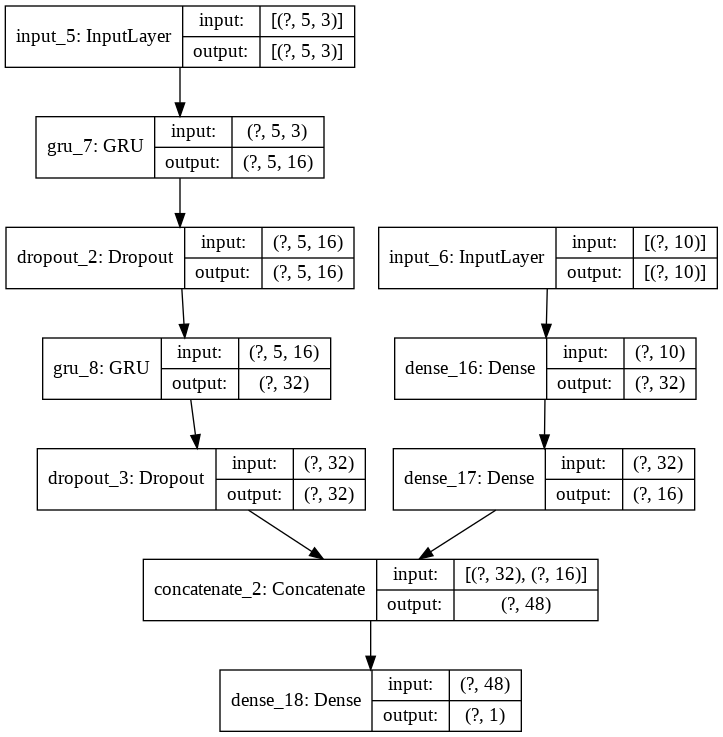

In [ ]:
RNN_EXO_3 = keras.models.Sequential()
RNN_EXO_3 = keras.models.load_model('/content/case2_RNN_EXO_3_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_3, show_shapes=True)

### PREDIÇÃO COM O MODELO MISTO COM O MENOR ERRO ABS MEDIO NA FASE EXPERIMENTAL

#### **RNN_EXO_2**

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 63160.46 : 182 linhas
ERRO DE PREVISÃO = 4507.4609375 7.6849622994561235 % do total consumido
CORRELAÇÃO (r): 0.5948978276890322 Pi (p) :8.351688330480996e-19
RMSE = 107.84934998425112
TOTAL DE REFEIÇÕES SUB PROJETADAS = -9677.23630142212
TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5169.778503417969
ERRO ABSOLUTO MEDIANO = 64.6863784790039
ERRO ABSOLUTO PERCENTUAL MEDIO = 230.94241005690503%


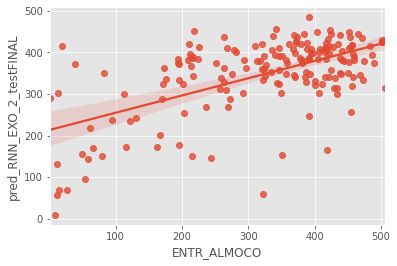

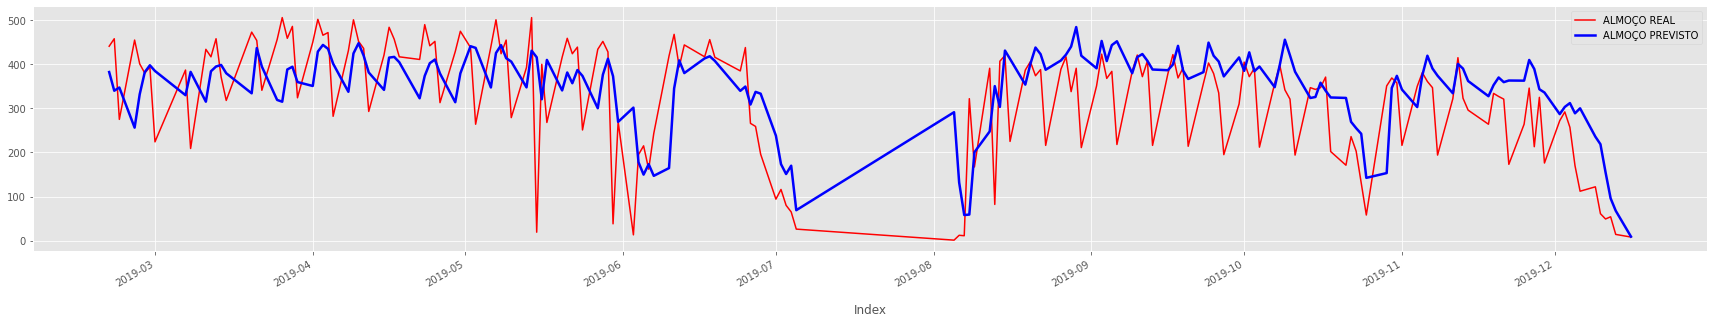

In [ ]:
#RNN_EXO_2
model_name = 'RNN_EXO_2'
model = RNN_EXO_2
x_test = (scaled_recurrent_test_x, scaled_discrete_test_x)
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)

reg = 'pred_' + model_name + '_testFINAL'
df_test[reg] = pred_y
df_models_metrics = metricas_predicoes(df_test, reg , df_models_metrics)

In [ ]:
RNN_EXO_2.get_weights()

[array([[ 0.08909282,  0.04664553,  0.02326537, -0.28274542, -0.06943386,
         -0.21413685, -0.2337263 ,  0.03704277, -0.08738703, -0.13330197,
          0.16174121, -0.19909656, -0.08746769,  0.05633011, -0.1643015 ,
         -0.22839789, -0.06946706,  0.02207568, -0.22185661, -0.3146488 ,
         -0.08254731, -0.01767705, -0.04534691, -0.08128851,  0.03091604,
          0.19694322, -0.19163316,  0.09480595,  0.09690403,  0.12010494,
         -0.1638424 , -0.16407524, -0.14619079,  0.02932803,  0.0808237 ,
          0.24750526, -0.02603742, -0.03490822,  0.10880458,  0.23732716,
         -0.06456833,  0.04325865,  0.22192828,  0.2187546 ,  0.06980115,
          0.09510913, -0.01639976,  0.16084674,  0.13842508,  0.08151937,
          0.3588433 , -0.00522325,  0.08553772, -0.0881041 , -0.18574376,
          0.2659735 , -0.00150562,  0.45089844,  0.20445496,  0.18496908,
         -0.04234512, -0.16219454,  0.01975271, -0.15509072,  0.12232999,
         -0.16384284,  0.07023743,  0.

In [ ]:
df_models_metrics.to_excel('/content/case2_df_models_metrics.xlsx')

In [ ]:
df_test

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test,pred_RNN_ENDO_2_testFINAL,pred_MLP_ENDO_1_testFINAL,pred_RNN_EXO_2_testFINAL
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-20,1,0,0,0,1,0,0,61,1,0.73,71.43,947.9,23.7,78,0.5,966,10,40,58,95,111,441,14,35,44,88,77,246,0,17,14,27,50,100,65,79.020714,62.571854,62.571854,67.317268,50.091915,456.342712,382.416962,283.176819,67.317268,50.091919,382.417084
2019-02-21,1,0,0,0,0,1,0,1,1,1.46,75.00,949.8,22.9,84,1.5,779,966,10,40,58,95,458,441,14,35,44,88,279,246,0,17,14,27,114,35,459.848724,347.059082,347.059082,432.812622,508.283020,468.135895,340.036774,151.240524,432.812592,508.283081,340.036835
2019-02-22,1,0,0,0,0,0,1,1,3,2.19,78.57,951.6,25.5,77,2.7,314,779,966,10,40,58,275,458,441,14,35,44,61,279,246,0,17,14,57,18,388.522095,383.884796,383.884796,404.804108,329.090057,418.127380,347.315704,204.548737,404.804108,329.090088,347.315704
2019-02-25,1,0,1,0,0,0,0,3,1,4.38,89.29,946.4,27.6,71,0.6,807,314,779,966,10,40,455,275,458,441,14,35,196,61,279,246,0,17,45,22,432.235291,294.330261,294.330261,400.811035,304.004944,295.358978,256.305359,247.179459,400.811035,304.004944,256.305328
2019-02-26,1,0,0,1,0,0,0,1,1,5.11,92.86,949.8,21.4,87,1.6,615,807,314,779,966,10,401,455,275,458,441,14,233,196,61,279,246,0,18,0,393.512115,329.142548,329.142548,411.179962,418.618652,323.483154,332.013275,299.521332,411.179962,418.618652,332.013306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10,0,1,0,1,0,0,0,1,1,95.52,32.26,947.8,22.9,81,1.8,75,157,116,291,283,414,61,122,112,170,257,292,19,69,39,132,111,163,379,211,195.135483,191.424683,191.424683,180.425507,176.402603,180.077759,218.612289,243.659103,180.425537,176.402649,218.612320
2019-12-11,0,1,0,0,1,0,0,1,1,96.27,35.48,946.6,22.9,82,1.6,45,75,157,116,291,283,49,61,122,112,170,257,9,19,69,39,132,111,334,144,142.265915,142.691605,142.691605,144.328751,84.207855,116.203125,155.100861,208.853088,144.328766,84.207840,155.100861
2019-12-12,0,1,0,0,0,1,0,1,1,97.01,38.71,945.2,22.2,75,1.0,43,45,75,157,116,291,54,49,61,122,112,170,8,9,19,69,39,132,221,171,126.133835,100.141594,100.141594,127.632721,83.821526,69.310188,95.805367,163.932114,127.632721,83.821533,95.805359


In [ ]:
df_test.to_excel('/content/case2_df_test.xlsx')

# Download xlsx files in /content/ folder and enjoy it =)